# Data Cleaning

## Objectives

* Answer business requirement 1: The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* outputs/datasets/collection/HousePricesRecords.csv

## Outputs

* Create a visualisation of the correlation between house attributes and the sale price. Create scatter plots and heat map showing each house attribute and the individual effect
* Save the corellation to outputs/house_price_corellation/v1/corr_df_rev.csv
* Save the dictionary used for object variables to outputs/house_price_corellation/v1/dic.csv

## Conclusion



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
current_dir = os.getcwd()
current_dir

'/workspace/PP5-ML-PROJECT/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-ML-PROJECT'

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/HousePricesRecords.csv"))
df.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856.0,854.0,3.0,No,706.0,GLQ,150.0,0.0,548.0,RFn,...,65.0,196.0,61.0,5,7,856.0,0.0,2003,2003,208500.0
1,1262.0,0.0,3.0,Gd,978.0,ALQ,284.0,NaN,460.0,RFn,...,80.0,0.0,0.0,8,6,1262.0,NaN,1976,1976,181500.0
2,920.0,866.0,3.0,Mn,486.0,GLQ,434.0,0.0,608.0,RFn,...,68.0,162.0,42.0,5,7,920.0,NaN,2001,2002,223500.0
3,961.0,NaN,NaN,No,216.0,ALQ,540.0,NaN,642.0,Unf,...,60.0,0.0,35.0,5,7,756.0,NaN,1915,1970,140000.0
4,1145.0,NaN,4.0,Av,655.0,GLQ,490.0,0.0,836.0,RFn,...,84.0,350.0,84.0,5,8,1145.0,NaN,2000,2000,250000.0
5,796.0,566.0,1.0,No,732.0,GLQ,64.0,NaN,480.0,Unf,...,85.0,0.0,30.0,5,5,796.0,NaN,1993,1995,143000.0
6,1694.0,0.0,3.0,Av,1369.0,GLQ,317.0,NaN,636.0,RFn,...,75.0,186.0,57.0,5,8,1686.0,NaN,2004,2005,307000.0
7,1107.0,983.0,3.0,Mn,859.0,ALQ,216.0,NaN,484.0,NaN,...,NaN,240.0,204.0,6,7,1107.0,NaN,1973,1973,200000.0
8,1022.0,752.0,2.0,No,0.0,Unf,952.0,NaN,468.0,Unf,...,51.0,0.0,0.0,5,7,952.0,NaN,1931,1950,129900.0
9,1077.0,0.0,2.0,No,851.0,GLQ,140.0,NaN,205.0,RFn,...,50.0,0.0,4.0,6,5,991.0,NaN,1939,1950,118000.0


---

# Data Understanding 

We are interested in understanding the dataset, checking the variable type and distribution, missing values and what these variables mean to the business

In [5]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

/tmp/ipykernel_11893/962869596.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Study of Correlation

- Compute the correlation matrix to find relationships between features.
- Extract and sort the top features correlated with sales price.

We use .corr() for spearman method and investigate the top 10 correlations

In [6]:
arr = []

for col in df.columns[df.dtypes!='object'].to_list():
    if col != 'SalePrice':
        df1 = df[df[col]!=0]
        df2 = df1[df1[col].notnull()]
        df3 = df2.filter(['SalePrice', col])
        corr_spearman = df3.corr(method='spearman')['SalePrice'][1:].round(2)
        arr.append(corr_spearman[col])
corr_num = pd.Series(index=df.columns[df.dtypes!='object'].drop(['SalePrice']).to_list(), data=arr).sort_values(key=abs, ascending=False)
print(corr_num)

OverallQual      0.81
GrLivArea        0.73
2ndFlrSF         0.69
YearBuilt        0.65
GarageArea       0.61
GarageYrBlt      0.59
1stFlrSF         0.58
TotalBsmtSF      0.58
YearRemodAdd     0.57
LotArea          0.46
LotFrontage      0.41
BsmtFinSF1       0.40
MasVnrArea       0.33
BedroomAbvGr     0.24
OpenPorchSF      0.16
WoodDeckSF       0.14
OverallCond     -0.13
BsmtUnfSF        0.11
EnclosedPorch   -0.01
dtype: float64


Now we have the values for the numerical variables we must caculate the correlation of the object variables so we will encode them to have numerical values then get the use corr() spearman method

Reminder of the ojbect variables and the values:

BsmtExposure: Refers to walkout or garden level walls Gd: Good Exposure; Av: Average Exposure; Mn: Mimimum Exposure; No: No Exposure; None: No Basement

BsmtFinType1: Rating of basement finished area GLQ: Good Living Quarters; ALQ: Average Living Quarters; BLQ: Below Average Living Quarters; Rec: Average Rec Room; LwQ: Low Quality; Unf: Unfinshed; None: No Basement

GarageFinish: Interior finish of the garage Fin: Finished; RFn: Rough Finished; Unf: Unfinished; None: No Garage

KitchenQual: Kitchen quality Ex: Excellent; Gd: Good; TA: Typical/Average; Fa: Fair; Po: Poor

In [7]:
# Create a dictionary to change the categories of these variables to numbers
dic = {'BsmtExposure': {'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, }, 'BsmtFinType1': {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0}, 'GarageFinish': {'Fin': 2, 'RFn': 1, 'Unf': 0}, 'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}}
arr = []

for col in df.columns[df.dtypes=='object'].to_list():
    df1 = df[df[col]!='None']
    df2 = df1[df1[col].notnull()]
    df3[col] = df2[col].replace(dic[col])
    df4 = df3.filter(['SalePrice', col])
    corr_spearman = df4.corr(method='spearman')['SalePrice'][1:].round(2)
    arr.append(corr_spearman[col])

corr_list = pd.Series(index=df.columns[df.dtypes=='object'].to_list(), data=arr).sort_values(key=abs, ascending=False)
corr_list

KitchenQual     0.67
GarageFinish    0.60
BsmtFinType1    0.33
BsmtExposure    0.30
dtype: float64

Now we will merge both lists of correlation coefficients

In [8]:
# Ensure both lists are Pandas Series
corr_num = corr_num.sort_values(key=abs, ascending=False)
corr_list = corr_list.sort_values(key=abs, ascending=False)  

corr_mrg = pd.concat([corr_num, corr_list]).sort_values(key=abs, ascending=False)

corr_mrg.head(10)

OverallQual     0.81
GrLivArea       0.73
2ndFlrSF        0.69
KitchenQual     0.67
YearBuilt       0.65
GarageArea      0.61
GarageFinish    0.60
GarageYrBlt     0.59
1stFlrSF        0.58
TotalBsmtSF     0.58
dtype: float64

## Visualise Correlation Heatmap

Use a barplot in ascending order to visualise all correlation coefficients above >= 0.4

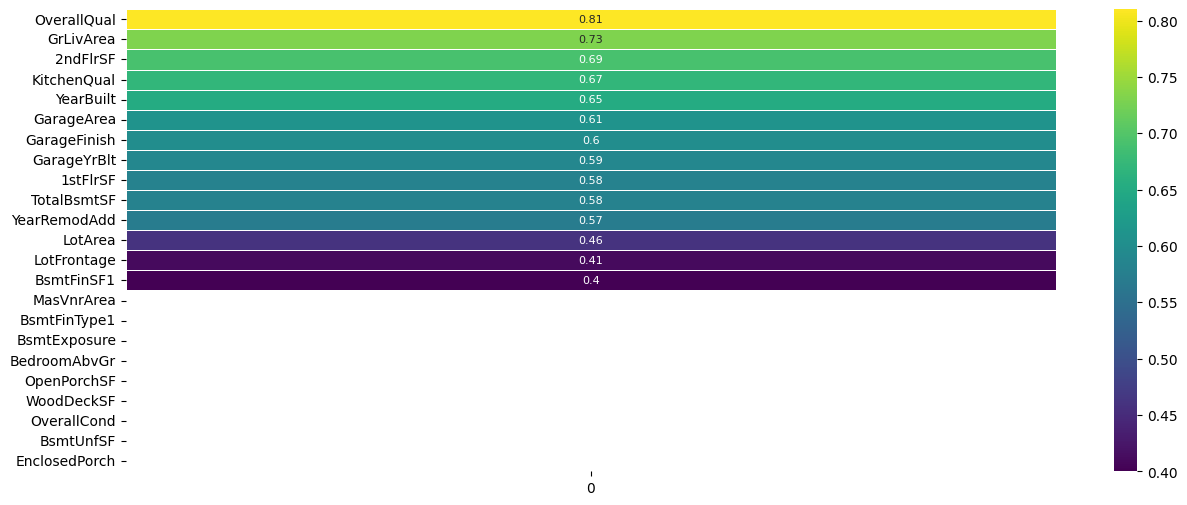

In [14]:
%matplotlib inline

corr_mrg = pd.DataFrame(corr_mrg)

fig, axes = plt.subplots(figsize=(15,6))
annot_size = 8

# Create a mask for correlations < 0.4
mask = np.zeros_like(corr_mrg, dtype=bool)
mask[np.abs(corr_mrg) < 0.4] = True

sns.heatmap(data=corr_mrg, annot=True, xticklabels=True, yticklabels=True,
            mask=mask, cmap='viridis', annot_kws={"size": 8}, ax=axes,
            linewidth=0.5)

plt.show()

 The moderately strong correlation have values in the range 0.4 to 0.6 and the strong correlation have values > 0.6. The house attribute most strongly correlated to the house price (with correlation coefficient 0.81) is the overall quality ('OverallQual') which is an ordinal variable.

In [17]:
strong_correlation = ['OverallQual', 'GrLivArea', '2ndFlrSF', 'KitchenQual', 'YearBuilt', 'GarageArea', 'GarageFinish']
moderate_correlation = ['GarageYrBlt', '1stFlrSF', 'TotalBsmtSF', 'YearRemodAdd', 'LotArea', 'LotFrontage', 'BsmtFinSF1']
dtype_dict = {'OverallQual': 'object', 'GrLivArea': 'numeric', '2ndFlrSF': 'numeric', 'KitchenQual': 'object', 'YearBuilt': 'numeric', 'GarageArea': 'numeric', 'GarageFinish': 'object', 'GarageYrBlt': 'numeric', '1stFlrSF': 'numeric', 'TotalBsmtSF': 'numeric', 'YearRemodAdd': 'numeric', 'LotArea': 'numeric', 'LotFrontage': 'numeric', 'BsmtFinSF1': 'numeric'}

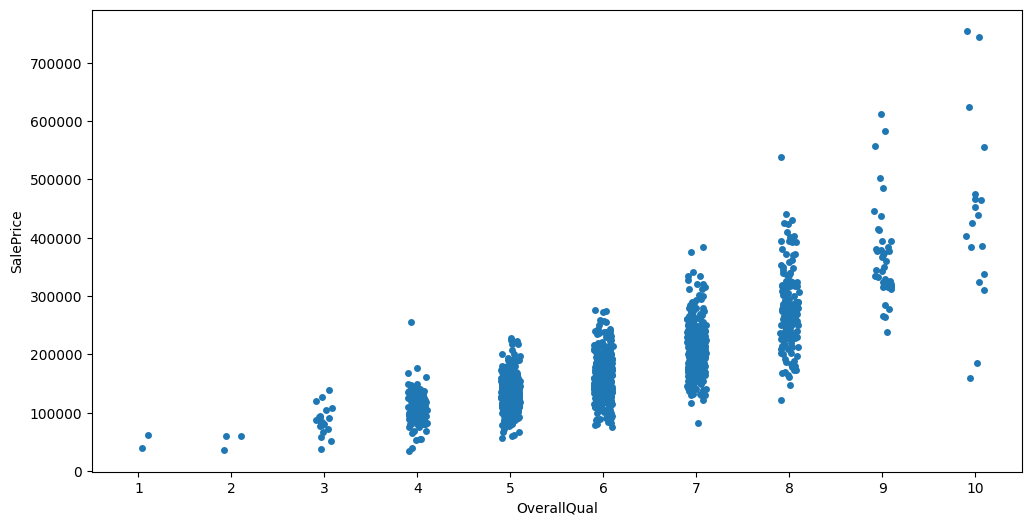

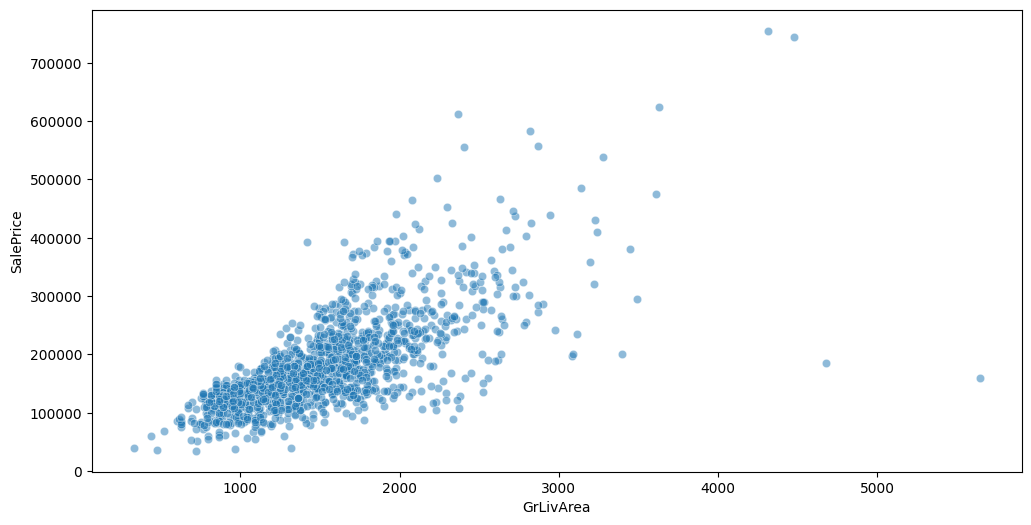

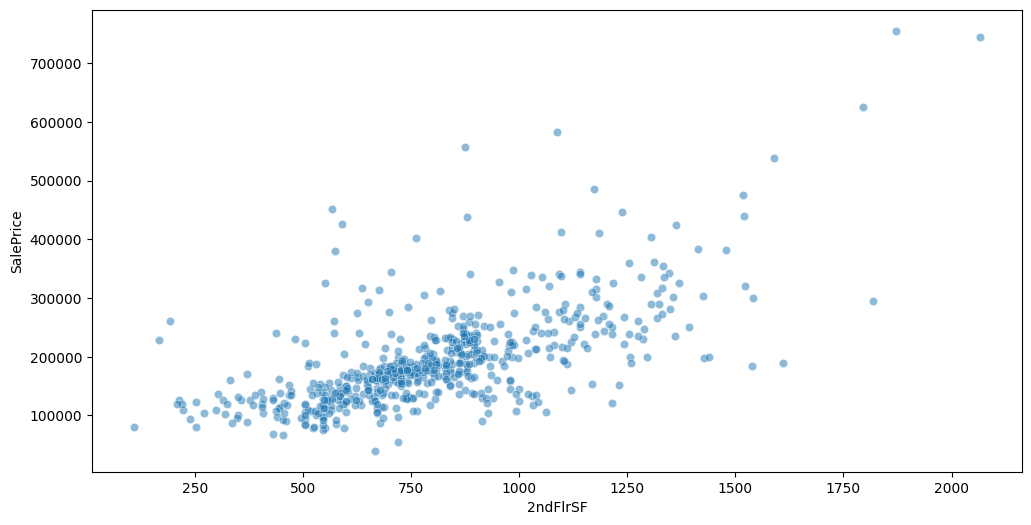

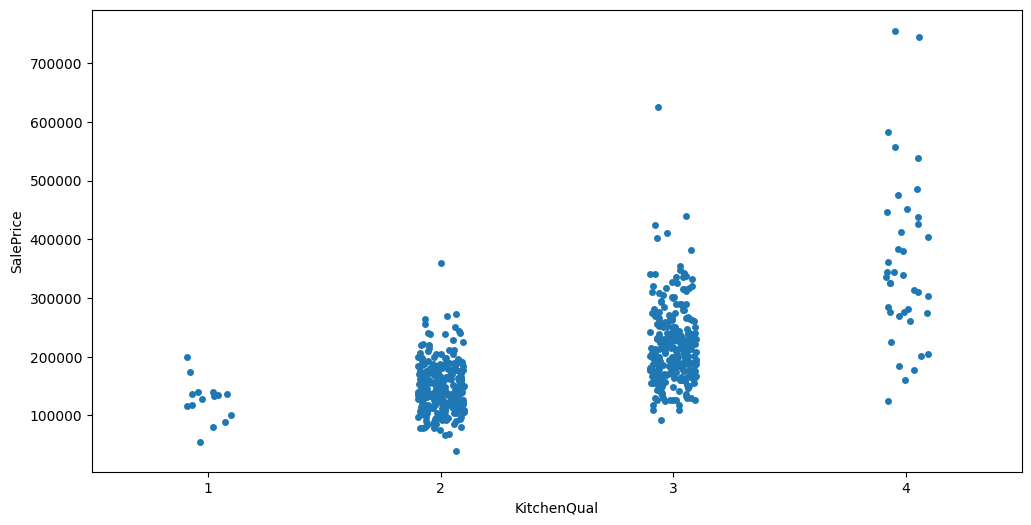

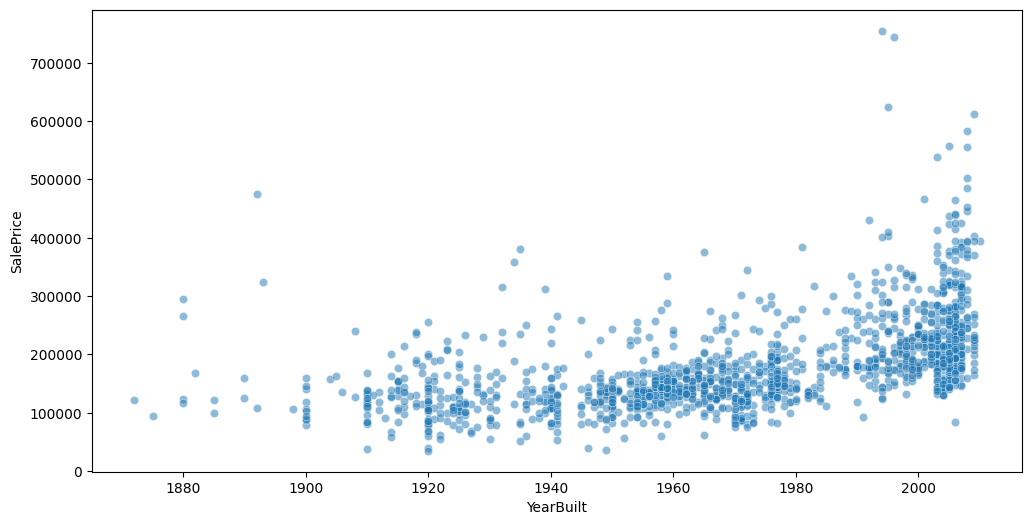

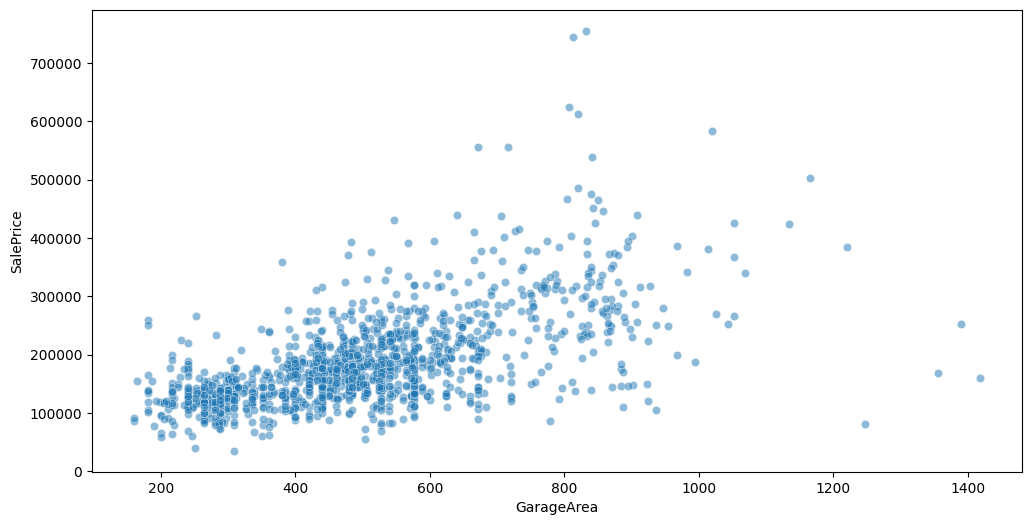

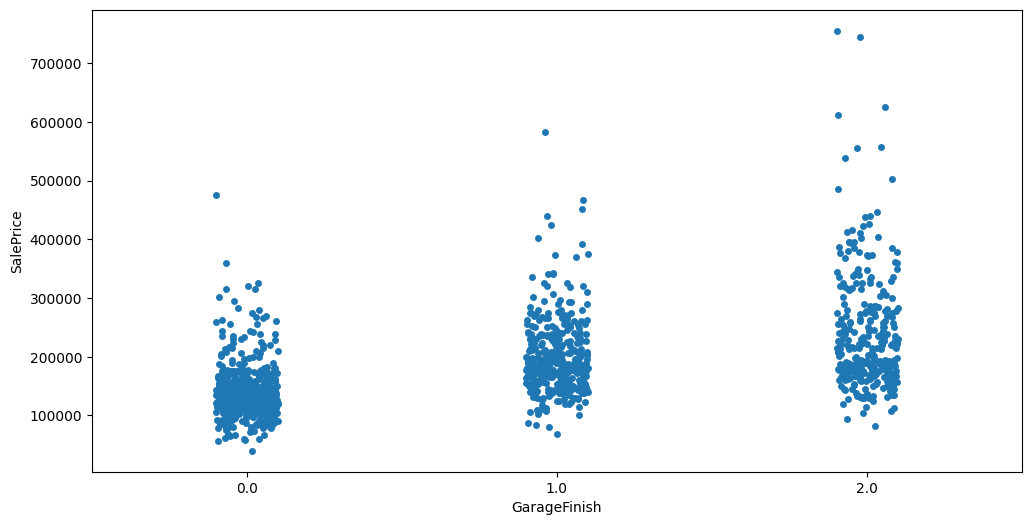

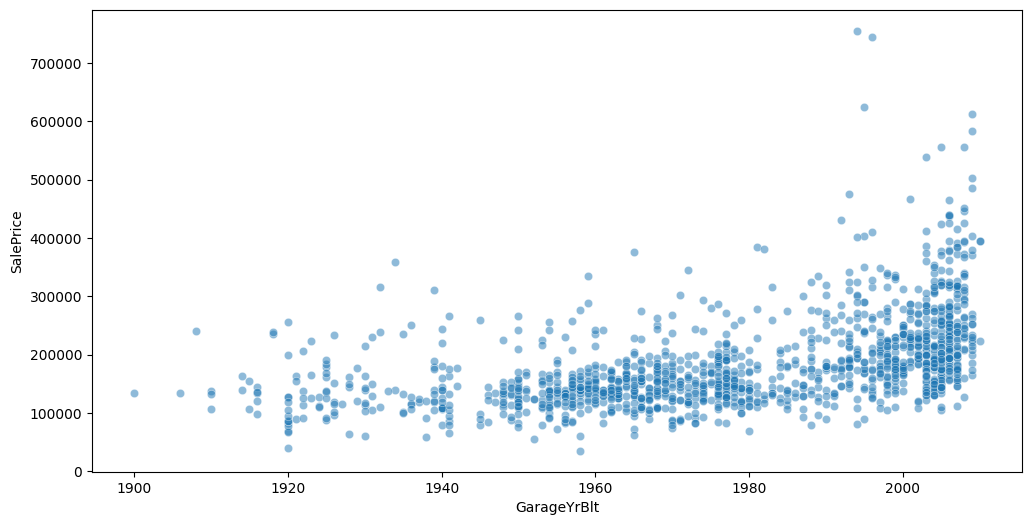

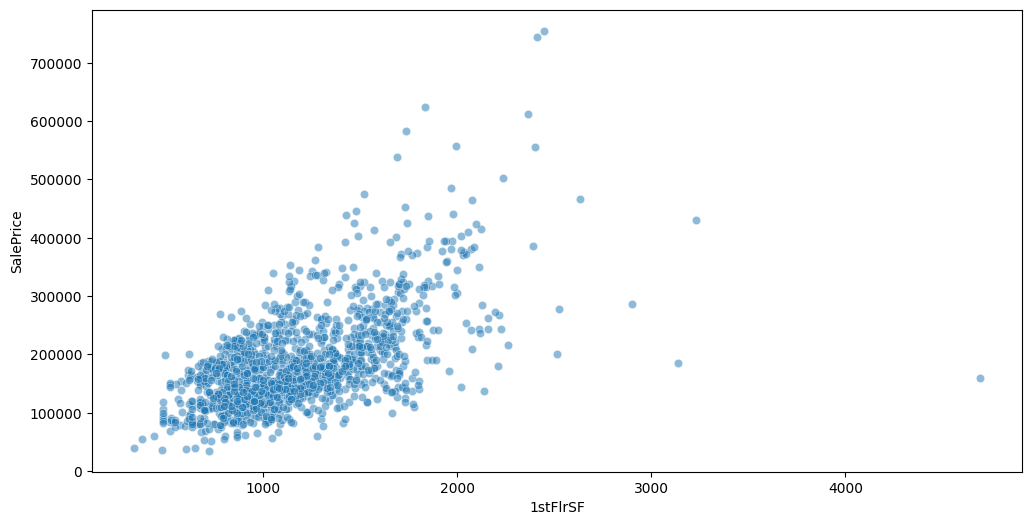

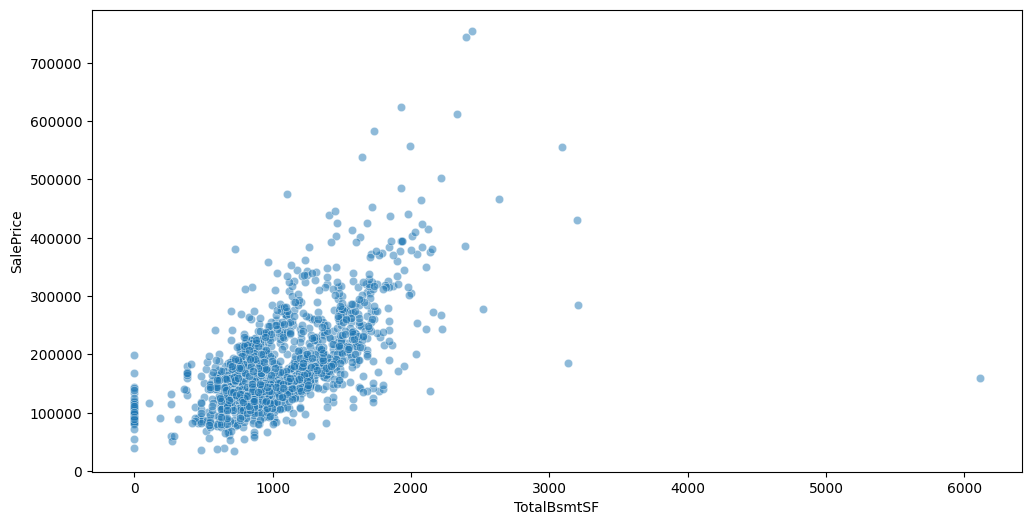

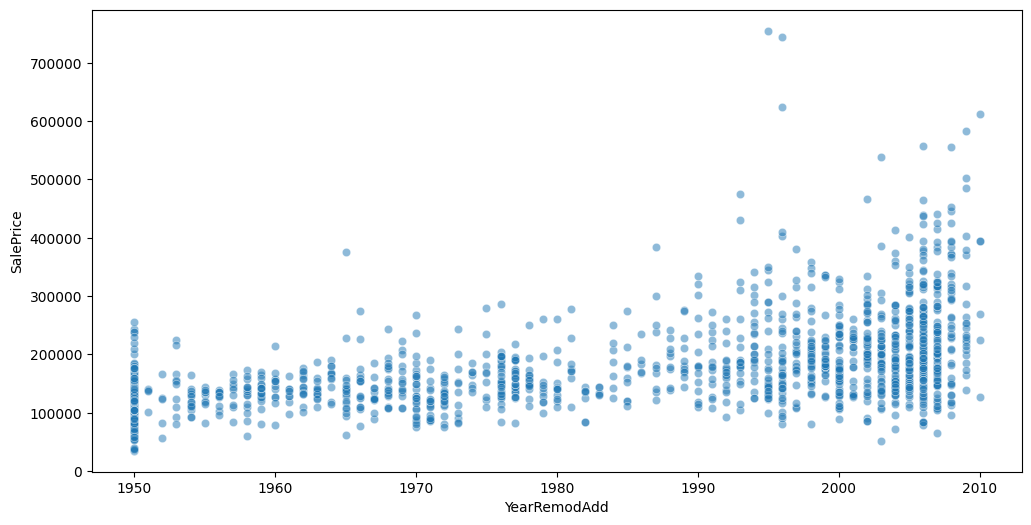

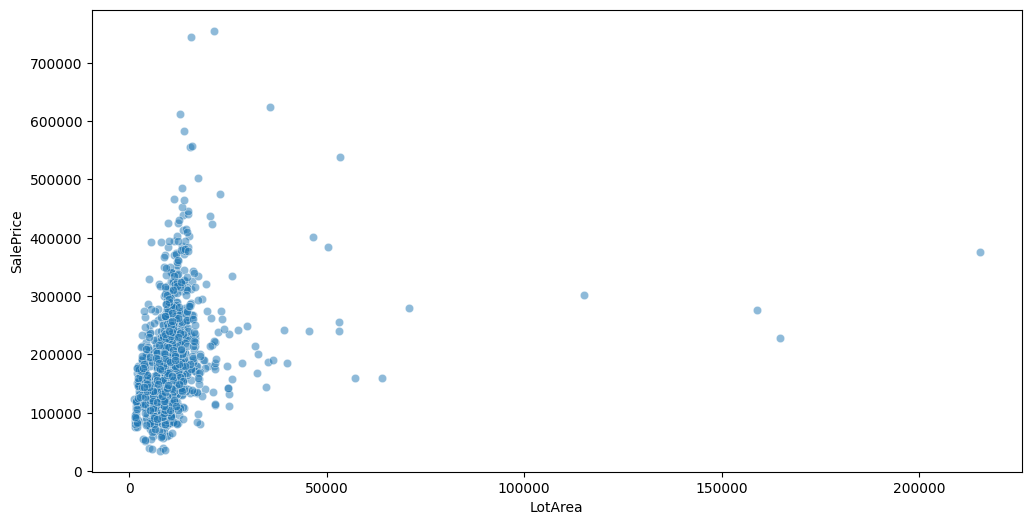

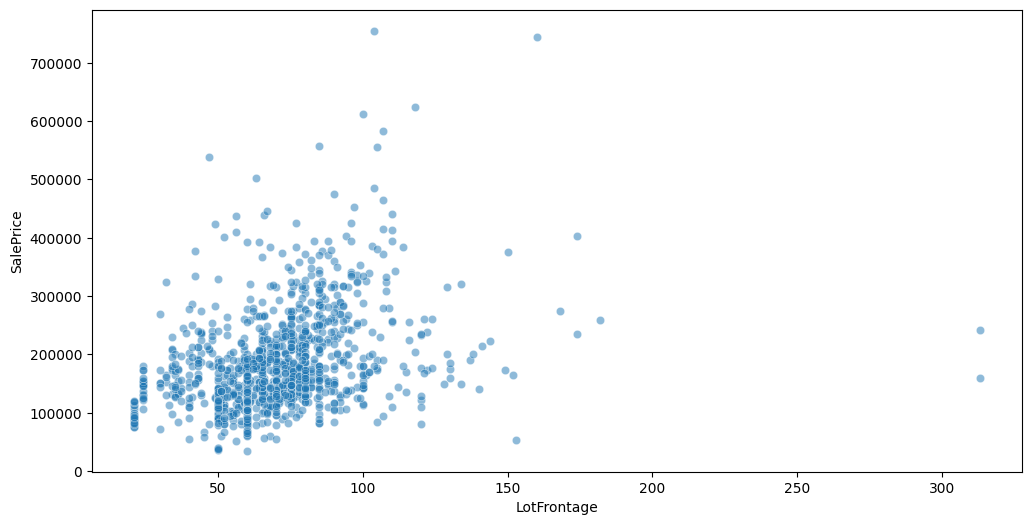

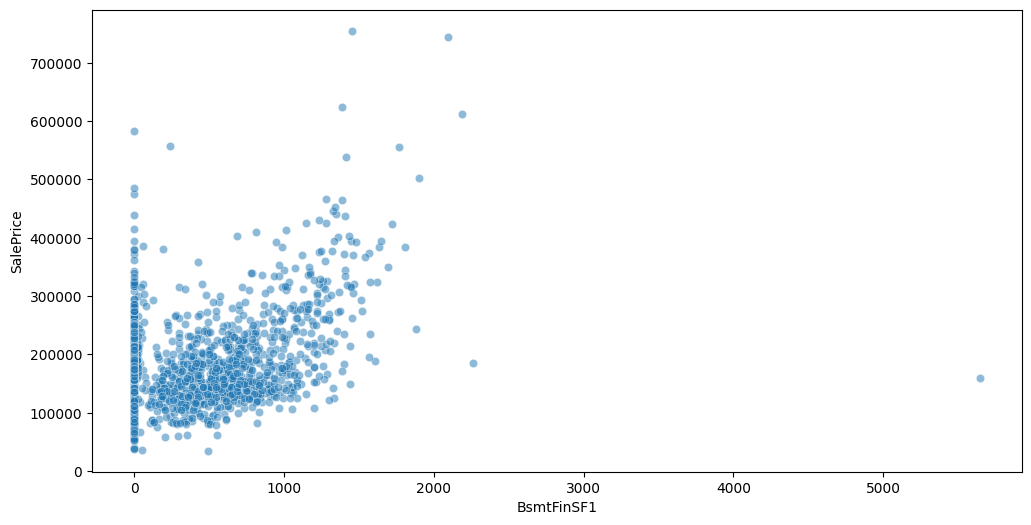

In [18]:
for col in strong_correlation:
    if df[col].dtype == 'object':
        df1 = df[df[col]!='None']
        df2 = df1[df1[col].notnull()]
        df3[col] = df2[col].replace(dic[col])
    else:
        df1 = df[df[col]!=0]
        df3 = df1[df1[col].notnull()]
    if dtype_dict[col] == 'object':
        fig, axes = plt.subplots(figsize=(12,6))
        sns.stripplot(data=df3, x=col, y='SalePrice')
        plt.show()
    elif dtype_dict[col] == 'numeric':
        fig, axes = plt.subplots(figsize=(12,6))
        sns.scatterplot(data=df3, x=col, y='SalePrice', alpha=0.5)
        plt.show()

for col in moderate_correlation:
    if df[col].dtype == 'object':
        df1 = df[df[col]!='None']
        df2 = df1[df1[col].notnull()]
        df3[col] = df2[col].replace(dic[col])
    else:
        df1 = df[df[col]!=0]
        df3 = df1[df1[col].notnull()]
    if dtype_dict[col] == 'object':
        fig, axes = plt.subplots(figsize=(12,6))
        sns.stripplot(data=df, x=col, y='SalePrice')
        plt.show()
    elif dtype_dict[col] == 'numeric':
        fig, axes = plt.subplots(figsize=(12,6))
        sns.scatterplot(data=df, x=col, y='SalePrice', alpha=0.5)
        plt.show()

---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---